In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from ipywidgets import interact
import csv
import requests
import streamlit as st
#from streamlit_jupyter import StreamlitPatcher, tqdm
#StreamlitPatcher().jupyter()  # register streamlit with jupyter-compatible wrappers
import altair as alt
import plotly.express as px

In [22]:
#Grabbing the latest version of the full table from NASA's exoplanet archive website

# URL from which to fetch the content
url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps&format=csv"

# Make a GET request to fetch the content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # If successful, write the content to a CSV file
    with open("full_table_nasa_url.csv", "wb") as file:
        file.write(response.content)
    print("Success! Retrieved full_table_nasa_url.csv")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")


Success! Retrieved full_table_nasa_url.csv


In [23]:
#Converting the table to a dataframe
full_table_df = pd.read_csv('full_table_nasa_url.csv')
#full_table_df = pd.read_csv('full_table_exoplanets.csv')

/tmp/ipykernel_15599/3300786964.py:2: DtypeWarning: Columns (50,65,148,153,183,187,206,211,237,242) have mixed types. Specify dtype option on import or set low_memory=False.
  full_table_df = pd.read_csv('full_table_nasa_url.csv')


In [24]:
#full_table_df

In [25]:
table_confirmed_planets_df = full_table_df[full_table_df['default_flag'] > 0]

In [26]:
table_confirmed_planets_df.reset_index(drop=True, inplace=True)
table_confirmed_planets_df.index +=1

In [27]:
#table_confirmed_planets_df

In [28]:
count = table_confirmed_planets_df.shape[0]
print(count)

5587


In [29]:
# Export the DataFrame to a CSV file
table_confirmed_planets_df.to_csv('confirmed_exoplanets_data.csv', index_label='ID')

In [30]:
st.set_page_config(
    page_title="Exoplanet Population Dashboard",
    page_icon="🏂",
    layout="wide",
    initial_sidebar_state="expanded")

alt.themes.enable("dark")

ThemeRegistry.enable('dark')

In [31]:
exoplanet_name = 'OGLE-TR-10 b'

value_pl_rade = table_confirmed_planets_df.loc[table_confirmed_planets_df['pl_name'] == exoplanet_name, 'pl_rade'].iloc[0]

print(value_pl_rade)

14.011


In [32]:
def categorize_by_radius(radius):
    if radius >11: 
        return 'gas_giants'
    elif 2.24 < radius < 4.0: 
        return 'ice_giants'
    elif 1 < radius < 2.24: 
        return 'super_earths'
    elif 0.1 < radius < 1.0:
        return 'terrestrial'
    else:
        return 'unknown'  # For values that don't fit in any bucket

# Apply the function to the 'pl_rade' column and count the instances
category_counts_size = table_confirmed_planets_df['pl_rade'].apply(categorize_by_radius).value_counts()

# Print the counts for each category
print(category_counts_size)

pl_rade
unknown         1811
super_earths    1682
ice_giants      1313
gas_giants       581
terrestrial      200
Name: count, dtype: int64


In [33]:
def categorize_by_mass(mass):
    if mass > 158:
        return 'gas_giants'
    elif 10 <= mass <=20:
        return 'ice_giants'
    elif  1 <= mass <=10:
        return 'super_earths'
    elif  0.055 <= mass <=1:
        return 'terrestrial'
    else:
        return 'unknown'  # For values that don't fit in any bucket

# Apply the function to the 'pl_bmasse' column and count the instances
category_counts_size = table_confirmed_planets_df['pl_bmasse'].apply(categorize_by_mass).value_counts()

# Print the counts for each category
print(category_counts_size)

pl_bmasse
unknown         3484
gas_giants      1371
super_earths     479
ice_giants       232
terrestrial       21
Name: count, dtype: int64


In [34]:
def categorize_by_size_and_mass(radius, mass):
    if radius > 4.5 or mass >= 159:
        return 'gas_giants'
    elif 2.1 < radius <= 4.5 or 10 <= mass <159:
        return 'ice_giants'
    elif 1.0 < radius <= 2.1 or 1 <= mass <10:
        return 'super_earths'
    elif 0.1 < radius <= 1.0 or 0.1 < mass < 1:
        return 'terrestrial'
    else:
        return 'unknown'  # For values that don't fit in any bucket
  

In [35]:
# Apply the function to each row of the DataFrame
# Note: axis=1 specifies that the function should be applied to each row instead of each column
table_confirmed_planets_df['category'] = table_confirmed_planets_df.apply(lambda row: categorize_by_size_and_mass(row['pl_rade'], row['pl_bmasse']), axis=1)

# Count the number of instances in each category
category_counts = table_confirmed_planets_df['category'].value_counts()

# Display the counts
print(category_counts)

category
ice_giants      1912
gas_giants      1766
super_earths    1698
terrestrial      192
unknown           19
Name: count, dtype: int64


/tmp/ipykernel_15599/314384748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_confirmed_planets_df['category'] = table_confirmed_planets_df.apply(lambda row: categorize_by_size_and_mass(row['pl_rade'], row['pl_bmasse']), axis=1)


In [37]:
table_confirmed_planets_df['category']

1         gas_giants
2         ice_giants
3         gas_giants
4         gas_giants
5         ice_giants
            ...     
5583    super_earths
5584      ice_giants
5585      ice_giants
5586    super_earths
5587      ice_giants
Name: category, Length: 5587, dtype: object

In [16]:
# Filter the DataFrame for planets in the 'unknown' category
unknown_planets = table_confirmed_planets_df[table_confirmed_planets_df['category'] == 'unknown']

# Select the 'pl_name' column and print the planet names
print("Planets in the 'unknown' category:")
for name in unknown_planets['pl_name']:
    print(name)

Planets in the 'unknown' category:
GJ 667 C b
TOI-1634 c
HIP 41378 b
HIP 41378 c
HIP 41378 e
HIP 41378 d
HIP 41378 f
Kepler-37 e
Kepler-416 c
MWC 758 c
HD 160691 d
LkCa 15 c
LkCa 15 b
KIC 10001893 c
Kepler-415 c
Kepler-417 c
PSR B1257+12 b
KIC 10001893 d
KIC 10001893 b


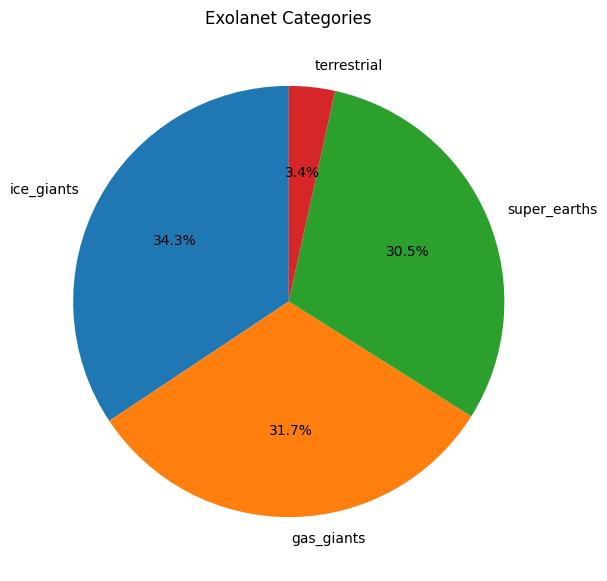

In [20]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
categories = category_counts.index.to_list()
counts = category_counts.values


if 'unknown' in categories:
    index_to_remove = categories.index('unknown')

    # Remove the category and its corresponding count
    del categories[index_to_remove]
    counts = [count for i, count in enumerate(counts) if i != index_to_remove]



plt.figure(figsize=(10, 7))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title('Exoplanet Categories')
plt.show()

In [63]:
# Create a boolean mask where True corresponds to rows with 'terrestrial' category
terrestrial_mask = table_confirmed_planets_df['category'] == 'terrestrial'

# Use the mask to filter the DataFrame, keeping only rows where the category is 'terrestrial'
terrestrial_planets_df = table_confirmed_planets_df[terrestrial_mask]


# Create a boolean mask where True corresponds to rows with 'gas_giants' category
gas_giants_mask = table_confirmed_planets_df['category'] == 'gas_giants'

# Use the mask to filter the DataFrame, keeping only rows where the category is 'gas_giants'
gas_giants_planets_df = table_confirmed_planets_df[gas_giants_mask]    


# Create a boolean mask where True corresponds to rows with 'ice_giants' category
ice_giants_mask = table_confirmed_planets_df['category'] == 'ice_giants'

# Use the mask to filter the DataFrame, keeping only rows where the category is 'gas_giants'
ice_giants_planets_df = table_confirmed_planets_df[ice_giants_mask]       

# Create a boolean mask where True corresponds to rows with 'super_earths' category
super_earths_mask = table_confirmed_planets_df['category'] == 'super_earths'

# Use the mask to filter the DataFrame, keeping only rows where the category is 'gas_giants'
super_earths_planets_df = table_confirmed_planets_df[super_earths_mask]      

NameError: name 'terrestrial_planet_df' is not defined

Text(0, 0.5, 'Mass (Earth Masses)')

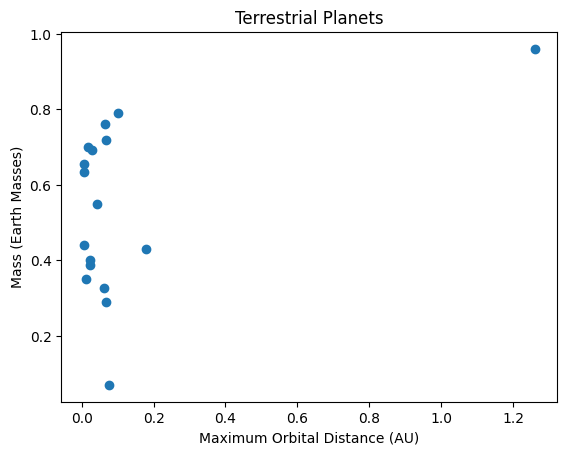

In [59]:
# Create a scatter plot
plt.scatter(terrestrial_planets_df['pl_orbsmax'], terrestrial_planets_df['pl_bmasse'])
plt.title('Terrestrial Planets')
plt.xlabel('Maximum Orbital Distance (AU)')
plt.ylabel('Mass (Earth Masses)')


Text(0, 0.5, 'Mass (Earth Masses)')

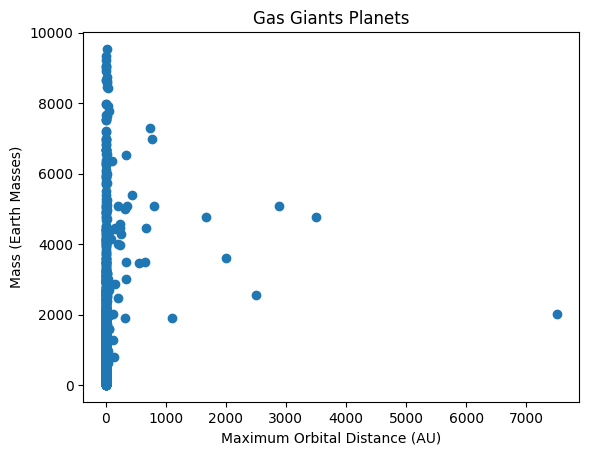

In [60]:
# Create a scatter plot
plt.scatter(gas_giants_planets_df['pl_orbsmax'], gas_giants_planets_df['pl_bmasse'])
plt.title('Gas Giants Planets')
plt.xlabel('Maximum Orbital Distance (AU)')
plt.ylabel('Mass (Earth Masses)')

Text(0, 0.5, 'Mass (Earth Masses)')

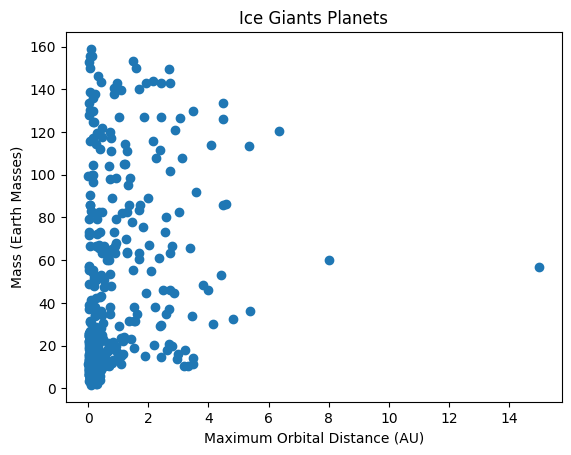

In [61]:
# Create a scatter plot
plt.scatter(ice_giants_planets_df['pl_orbsmax'], ice_giants_planets_df['pl_bmasse'])
plt.title('Ice Giants Planets')
plt.xlabel('Maximum Orbital Distance (AU)')
plt.ylabel('Mass (Earth Masses)')

In [53]:
terrestrial_planets_df.to_csv('terrestrial_planets_data.csv', index_label='ID')

Text(0, 0.5, 'Mass (Earth Masses)')

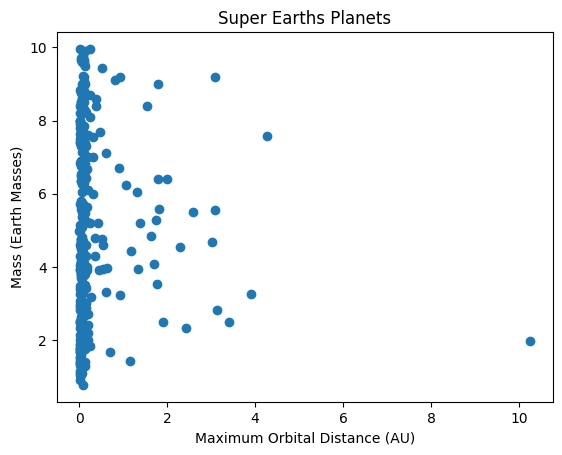

In [62]:
# Create a scatter plot
plt.scatter(super_earths_planets_df['pl_orbsmax'], super_earths_planets_df['pl_bmasse'])
plt.title('Super Earths Planets')
plt.xlabel('Maximum Orbital Distance (AU)')
plt.ylabel('Mass (Earth Masses)')